#                    Investigate a Dataset Project - Titanic Data

## Kaggle Overview

The training set, provide the outcome (also known as the “ground truth”) for each passenger. 

A.  Data Dictionary

    Variable	Definition	    Key
    survival	Survival	    0 = No, 1 = Yes
    pclass   	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

    sex	        Sex	
    Age	        Age in years	
    sibsp	    # of siblings / spouses aboard the Titanic	
    parch	    # of parents / children aboard the Titanic	
    ticket	    Ticket number	
    fare	    Passenger fare	
    cabin	    Cabin number	
    embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

B.  Variable Notes
    class:     A proxy for socio-economic status (SES)
                1st = Upper
                2nd = Middle
                3rd = Lower

    age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

    sibsp: The dataset defines family relations in this way...
    Sibling = brother, sister, stepbrother, stepsister
    Spouse = husband, wife (mistresses and fiancés were ignored)

    parch: The dataset defines family relations in this way...
    Parent = mother, father
    Child = daughter, son, stepdaughter, stepson
    Some children travelled only with a nanny, therefore parch=0 for them.


## 1. Data Analysis - Questions

    Questions and insights I would like to obtain from the data

    1. How many male and female in the 1st , 2nd and 3rd class?
    2. How many male, female and childrens?
    3. What is the oldest age and the youngest age in the passengers?
    4. What deck were the passengers on and how does that relate to their class?
    5. Where did the passengers come from?
    6. Who and How many passengers alone and How many and who were with family?
    7. How many passengers Survived?
    8. What factors helped someone survive the sinking?


## 2. Data Wrangling - Data Acquisition and Cleaning Data

In [62]:
# Import required libraries pandas and numpy

import pandas as pd
from pandas import Series, DataFrame

In [64]:
# Set up the Titanic data set csv file as a DataFrame and view the data

titanic_df = pd.read_csv('C:\\Users\\Skanda\\Desktop\\DANDJ\\Investigating Dataset\\train.csv')

In [65]:
# Preview of the top data from the dataframe
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
# Get overall info for the dataset

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [67]:
# Just checking the bottom data from dataframe

titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [68]:
# Know more about the data set , what is the maximum , minimum and average of the data set, which I am going to work on.

titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [69]:
# Importing more libries and ploting packages

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#%pylib inline

Q1. How many male and female in the 1st , 2nd and 3rd class?

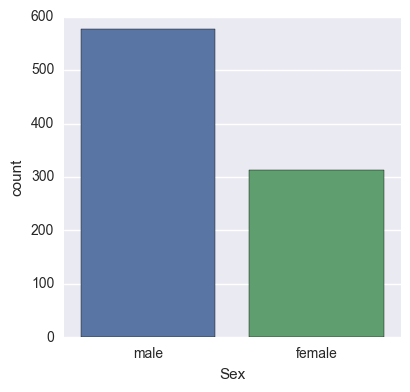

In [70]:
# First check gender then I will check in which calss are they.

sns.factorplot("Sex", data = titanic_df, kind = "count")

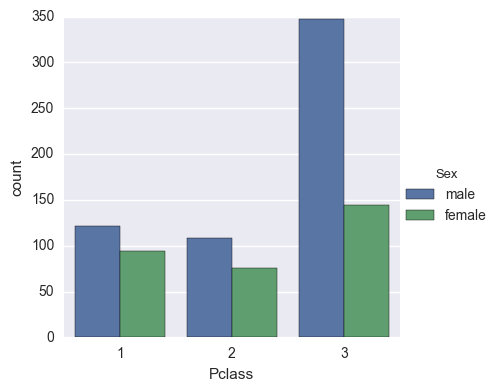

In [71]:
# let's seperate the male and female with the passenger class.

sns.factorplot('Pclass', data=titanic_df, hue='Sex', kind='count')

In [72]:
# Find out how many childrens in the passenger. I am defining age under 13 are childrens.

def male_female_child(passenger):
    age, sex = passenger
    
    if age < 13:
        return 'child'
    else:
        return sex

In [73]:
# Let's "apply" technique with a function to create a new column named "Person" and identify the childrens from the gender.
# Also seperating the passengers between female,male,and child. 

titanic_df['Person']= titanic_df[['Age', 'Sex']].apply(male_female_child,axis=1)

In [74]:
# Visualize the output , I am using slice to view the data

titanic_df[5:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,female


Q2: How many male, female and childrens? 

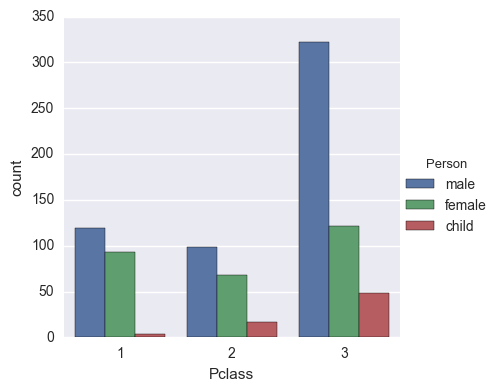

In [75]:
# Using the seaborn factorplot package, I am ploting the data to see how can we visualize or communicate the output
# of the passenger by gender and class. 

sns.factorplot('Pclass', data=titanic_df, hue='Person', kind='count')

In [76]:
# In Values by count

titanic_df['Person'].value_counts()

male      540
female    282
child      69
Name: Person, dtype: int64

Q3: What is the oldest age and the youngest age in the passengers?

In [77]:
# Let's get more information of the AGE dataset

titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Oldest is 80 years of age and the youngest is 0.42 years

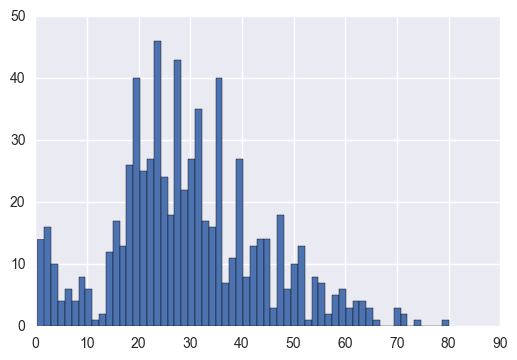

In [78]:
# Visualizing using the histogram

titanic_df['Age'].hist(bins=60)

### Cleaning Data

By checking the data, I found some NaN/Not a Number in the Cabin.

In [79]:
# Let's get the preview of the dataframe.

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [80]:
# Also I founf NaN data in the Age column, 177 total 

Num_Nan_Age = titanic_df["Age"].isnull().sum()
Num_Nan_Age

177

In [81]:
# From the mean I found the the mean age is 29.67, I am filling those NaN ages with 30 years

Num_Nan_Age_Fill = titanic_df["Age"][np.isnan(titanic_df["Age"])] = 30
Num_Nan_Age_Fill  

C:\Users\Skanda\Anaconda2\envs\DAND\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


30

In [82]:
# Count the number of NaN in the Cabin column

Num_Nan_Cabin = titanic_df["Cabin"].isnull().sum()


In [83]:
# I am seeing NaN values inthe Cabin column also, I think, it will not cause any remarkable impact on my current analysis. 
# I am dropping the NaN values and create a new object called "Deck".

Deck = titanic_df['Cabin'].dropna()

In [84]:
titanic_df["Cabin"].describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

In [85]:
# Preview the DECK dataset

Deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

Q4: What deck were the passengers on and how is relate to their class?

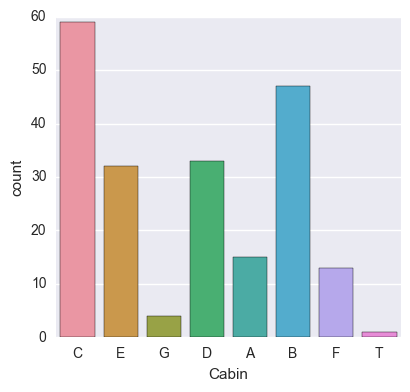

In [86]:
# Get more visualization of cabin and its passengers count

levels = []

for level in Deck:
    levels.append(level[0])

#levels    

cabin_df = DataFrame(levels)

cabin_df.columns = ['Cabin']

sns.factorplot('Cabin', data = cabin_df, kind = 'count') 
    


I noticed that there is a new cabin, not in the Dataset. Which is 'T' deck. we can drop it out. 
Also the cabin is not in order.

In [87]:
# Drop the unknown cabin "T" not in the Kaggle/Titanic Datset. 

cabin_df = cabin_df[cabin_df.Cabin != 'T']

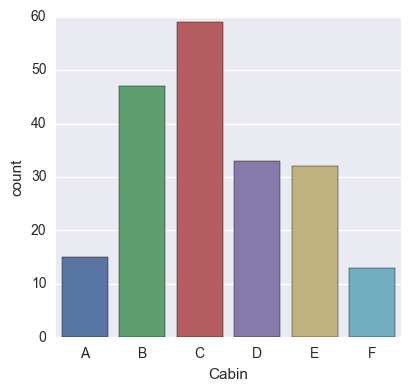

In [88]:
# Using factorplot analyze and visualize the cabin distribution.

sns.factorplot('Cabin', data=cabin_df, x_order=['A', 'B', 'C', 'D', 'E', 'F'],kind='count')

In [89]:
# Preview the data set, that the Embarked Column has S, C, Q values.
# These are for Southhampton, Cherbourg, Queenstown.

titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


Q5: Where is the passengers from, which city?

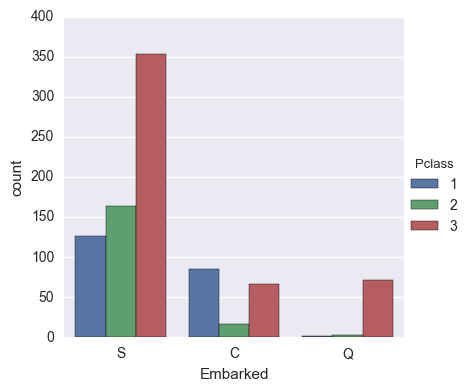

In [90]:
# Using factorplot, Visualize, how those passengers are boarded in which class from which embarked city. 

sns.factorplot('Embarked', data = titanic_df, hue='Pclass', kind='count')

## 3. Exploring Data - Build Intuition and Find Patterns 

Q6: Who and How many passengers were alone and were with family?

In [91]:
# Adding a new column to define "Family_Alone" and add the parent/child column with the sibsp column

titanic_df['Family_Alone'] = titanic_df.SibSp + titanic_df.Parch

In [92]:
# I know that if the Alone column is anything but 0, then the passenger with family wasn't alone. 
# Therefore change the column now so that if the value is greater than 0,
# titanic_df['Family_Alone'][0]

titanic_df['Family_Alone'].loc[titanic_df['Family_Alone'] > 0] = 'With Family'
                               
titanic_df['Family_Alone'].loc[titanic_df['Family_Alone'] == 0] = 'Alone'                               

In [93]:
#Preview to check the output

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Family_Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


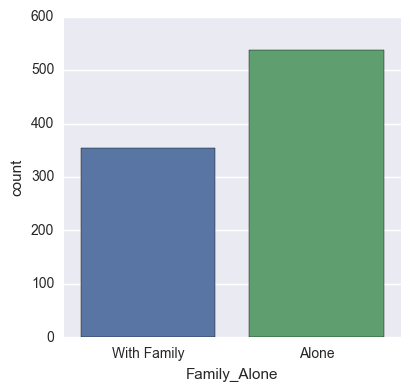

In [94]:
# Using factorplot visualize the results to communicate more.

sns.factorplot('Family_Alone', data = titanic_df, kind = 'count')

In [95]:
# Let's check, how many are with Family and how many are alone.

titanic_df['Family_Alone'].value_counts()

Alone          537
With Family    354
Name: Family_Alone, dtype: int64

In [96]:
#  Let's start by creating a new column Survivor and get a overall view of survied vs died.

Survival = {0:'No', 1:'Yes'}

titanic_df['Survivor'] = titanic_df.Survived.map(Survival)

In [97]:
# Get an overall view of survied vs died.

titanic_df['Survivor'].tail()
#titanic_df.tail()


886     No
887    Yes
888     No
889    Yes
890     No
Name: Survivor, dtype: object

In [98]:
# Preview the new dataset.

titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Family_Alone,Survivor
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,male,Alone,No
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,female,Alone,Yes
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.45,NaN,S,female,With Family,No
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,male,Alone,Yes
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,male,Alone,No


Q7: How many passengers Survived?

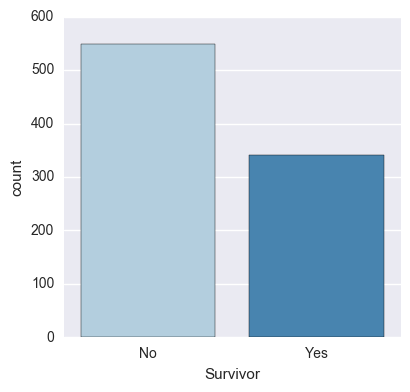

In [99]:
# Visualize the Survivor Vs Died by using factorplot.

# Survived = YES 
# Died = No

sns.factorplot('Survivor', data = titanic_df, palette='Blues', kind='count')

 By looking at the plot, more people died than those who survived. 

In [100]:
# Number of passengers Survived and number of passengers died in values

titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Q8: What factors helped someone to Survive?

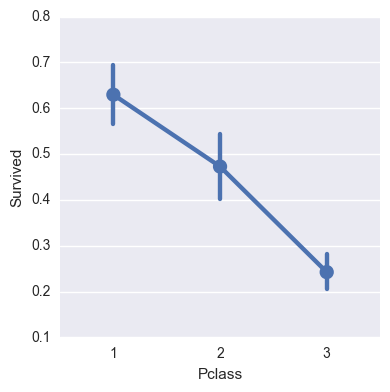

In [101]:
# Let's see how the passanger class have an effect.

sns.factorplot('Pclass','Survived',data=titanic_df)

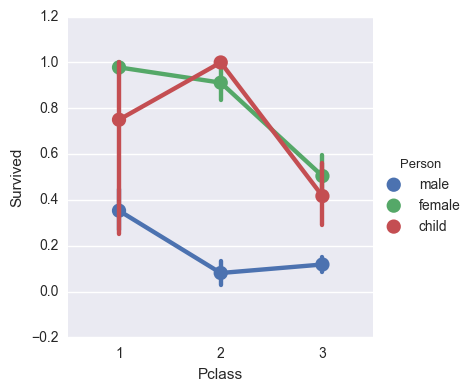

In [102]:
# Let's use a factor plot again, but now considering passanger class with gender

sns.factorplot('Pclass', 'Survived', hue='Person',data = titanic_df)

In [103]:
# Create a new data frame called surviveddeck_df by joining cabin_df and titanic_df

surviveddeck_df = cabin_df.join(titanic_df['Survived'])

In [104]:
# Preview of the new joined data set 

surviveddeck_df.head()

,Cabin,Survived
0,C,0
1,C,1
2,E,1
3,G,1
4,C,0


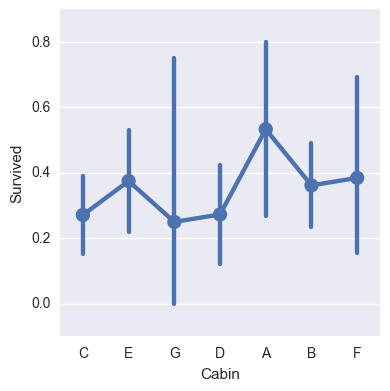

In [105]:
# Survival rate, when I invetigate the passengers from different level of Cabins. 

sns.factorplot('Cabin', 'Survived', data = surviveddeck_df)

## 4. Conclutions

### 1. Limitations: 

The are a number of limitations with the Titanic Dataset:
First it is only sample of Dataset. Secondly, we are seeing missing Data.

The size of the sample data could also impact the results.

### 2. Factors of Suvival rate:

1. Overall, the investigation provided us with some interesting insight based on factors of survivors on the Titanic. Quite a few more people died than those who survived. I am seeing that 549 pasengers died and 342 survived. 

2. There was very strong data supporting that a higher class indicated a higher proportion of survivors. The class of the passengers had an effect on their survival rate. 3rd class passengers did not survive well as their 1st and 2nd class passengers.
 
3. Gender also played a close role. "Women and children" was certainly a phrase that nicely sums up this gender discrepancy . Age didn't have any impact with regards to a passenger's survival. Women with children had the chances to survive more than men. So the Class of passenger and the women with children influenced or helped the survival rate. Also, it looks like being a male or being in 3rd class were both not favourable for survival. Also noticed that the passenger with family had a chance to survive more than the without family member.

## 5. References

1. https://www.kaggle.com/c/titanic-gettingStarted
2. https://docs.python.org/2.7/
3. http://pandas.pydata.org/pandas-docs/stable/whatsnew.html#agg-api-for-dataframe-series
4. https://stackoverflow.com/questions/tagged/python